In [1]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [2]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
X, y = clusters(SIZE, std0 = 1.3, std1 = 1.6)

In [4]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-4.0607, -0.6471],
        [-2.6560, -3.8825],
        [-2.3922, -3.0459],
        [-2.3641, -4.5297],
        [-0.5297, -4.0768],
        [-0.8592, -2.3321],
        [-2.7046, -3.3576],
        [-4.1806, -2.3712],
        [-0.9526, -2.5138],
        [-2.5775, -3.3860],
        [-1.6721, -2.8777],
        [-3.7743, -4.4937],
        [-2.5970, -3.5020],
        [-2.1455, -3.5758],
        [-2.8376, -2.4824],
        [-3.1257, -3.4223],
        [-2.9633, -2.5802],
        [-3.8238, -2.4417],
        [-2.5811, -3.7044],
        [-3.0762, -3.0040],
        [-2.6368, -3.5414],
        [-5.4648, -2.4257],
        [-3.6606, -1.8814],
        [-2.5134, -1.2532],
        [-1.3896, -4.5102],
        [-2.4402, -1.8050],
        [-0.6883, -2.2141],
        [-3.0067, -3.0684],
        [-1.9112, -3.7873],
        [-2.7778, -3.7283],
        [-2.5615, -2.1908],
        [-2.4973, -4.3631],
        [-0.5758, -1.2698],
        [-3.6245, -1.2962],
        [-1.9603, -1.6901],
       

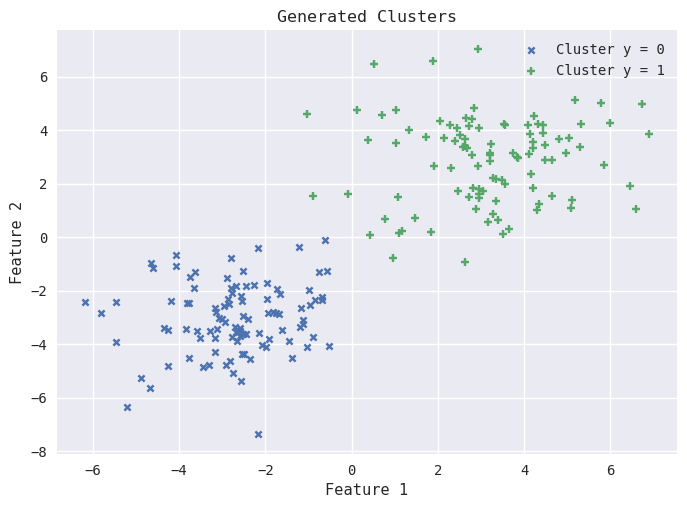

In [5]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [6]:
Model = LogisticRegression(in_dims=2).to(DEVICE)

In [7]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-4.0607, -0.6471],
         [-2.6560, -3.8825],
         [-2.3922, -3.0459],
         [-2.3641, -4.5297],
         [-0.5297, -4.0768],
         [-0.8592, -2.3321],
         [-2.7046, -3.3576],
         [-4.1806, -2.3712],
         [-0.9526, -2.5138],
         [-2.5775, -3.3860],
         [-1.6721, -2.8777],
         [-3.7743, -4.4937],
         [-2.5970, -3.5020],
         [-2.1455, -3.5758],
         [-2.8376, -2.4824],
         [-3.1257, -3.4223],
         [-2.9633, -2.5802],
         [-3.8238, -2.4417],
         [-2.5811, -3.7044],
         [-3.0762, -3.0040],
         [-2.6368, -3.5414],
         [-5.4648, -2.4257],
         [-3.6606, -1.8814],
         [-2.5134, -1.2532],
         [-1.3896, -4.5102],
         [-2.4402, -1.8050],
         [-0.6883, -2.2141],
         [-3.0067, -3.0684],
         [-1.9112, -3.7873],
         [-2.7778, -3.7283],
         [-2.5615, -2.1908],
         [-2.4973, -4.3631],
         [-0.5758, -1.2698],
         [-3.6245, -1.2962],
         [-1.9

In [8]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [9]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.BCELoss(reduction='mean'),        # Binary Cross-entropy Loss (For classification)
    device=DEVICE
)

In [10]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 1 / 20: 100%|██████████| 5/5 [00:00<00:00, 47.73it/s]


Loss: 0.2985
	| Validation Loss: 0.1952



Epoch 2 / 20: 100%|██████████| 5/5 [00:00<00:00, 1000.02it/s]


Loss: 0.1152
	| Validation Loss: 0.1108



Epoch 3 / 20: 100%|██████████| 5/5 [00:00<00:00, 832.70it/s]


Loss: 0.0797
	| Validation Loss: 0.1052



Epoch 4 / 20: 100%|██████████| 5/5 [00:00<00:00, 829.73it/s]


Loss: 0.0637
	| Validation Loss: 0.0789



Epoch 5 / 20: 100%|██████████| 5/5 [00:00<00:00, 1241.29it/s]


Loss: 0.0543
	| Validation Loss: 0.0751



Epoch 6 / 20: 100%|██████████| 5/5 [00:00<00:00, 1250.02it/s]


Loss: 0.0480
	| Validation Loss: 0.0483



Epoch 7 / 20: 100%|██████████| 5/5 [00:00<00:00, 1000.31it/s]


Loss: 0.0435
	| Validation Loss: 0.0501



Epoch 8 / 20: 100%|██████████| 5/5 [00:00<00:00, 1248.75it/s]


Loss: 0.0400
	| Validation Loss: 0.0402



Epoch 9 / 20: 100%|██████████| 5/5 [00:00<00:00, 1109.49it/s]


Loss: 0.0373
	| Validation Loss: 0.0401



Epoch 10 / 20: 100%|██████████| 5/5 [00:00<00:00, 1107.96it/s]


Loss: 0.0351
	| Validation Loss: 0.0543



Epoch 11 / 20: 100%|██████████| 5/5 [00:00<00:00, 1250.02it/s]


Loss: 0.0332
	| Validation Loss: 0.0337



Epoch 12 / 20: 100%|██████████| 5/5 [00:00<00:00, 586.65it/s]


Loss: 0.0316
	| Validation Loss: 0.0411



Epoch 13 / 20: 100%|██████████| 5/5 [00:00<00:00, 833.23it/s]


Loss: 0.0303
	| Validation Loss: 0.0286



Epoch 14 / 20: 100%|██████████| 5/5 [00:00<00:00, 999.07it/s]


Loss: 0.0291
	| Validation Loss: 0.0553



Epoch 15 / 20: 100%|██████████| 5/5 [00:00<00:00, 1244.01it/s]


Loss: 0.0281
	| Validation Loss: 0.0279



Epoch 16 / 20: 100%|██████████| 5/5 [00:00<00:00, 1098.45it/s]


Loss: 0.0271
	| Validation Loss: 0.0532



Epoch 17 / 20: 100%|██████████| 5/5 [00:00<00:00, 1249.94it/s]


Loss: 0.0263
	| Validation Loss: 0.0338



Epoch 18 / 20: 100%|██████████| 5/5 [00:00<00:00, 1208.94it/s]


Loss: 0.0255
	| Validation Loss: 0.0250



Epoch 19 / 20: 100%|██████████| 5/5 [00:00<00:00, 1250.09it/s]


Loss: 0.0248
	| Validation Loss: 0.0242



Epoch 20 / 20: 100%|██████████| 5/5 [00:00<00:00, 1244.16it/s]

Loss: 0.0242
	| Validation Loss: 0.0235



In [11]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 0.298534682393074, 1: 0.11523493081331253, 2: 0.07969235628843307, 3: 0.06373018845915794, 4: 0.05426516979932785, 5: 0.047997216880321505, 6: 0.04346479848027229, 7: 0.040028441697359085, 8: 0.03730631060898304, 9: 0.03506615571677685, 10: 0.033227961882948874, 11: 0.03163422122597694, 12: 0.030289758183062076, 13: 0.029105957224965097, 14: 0.02805392351001501, 15: 0.02712741969153285, 16: 0.026313522644340993, 17: 0.025518592447042465, 18: 0.02483726916834712, 19: 0.024205423891544342}

Validation Loss:
{0: 0.1952465996146202, 1: 0.11078108847141266, 2: 0.10521672666072845, 3: 0.07893583178520203, 4: 0.07506192475557327, 5: 0.04832502268254757, 6: 0.05007718503475189, 7: 0.04015825688838959, 8: 0.040060183964669704, 9: 0.054286008700728416, 10: 0.03370624128729105, 11: 0.041074808686971664, 12: 0.028567722532898188, 13: 0.055301886051893234, 14: 0.02790998015552759, 15: 0.05323716998100281, 16: 0.03379696421325207, 17: 0.024968877900391817, 18: 0.024154994171112776, 1

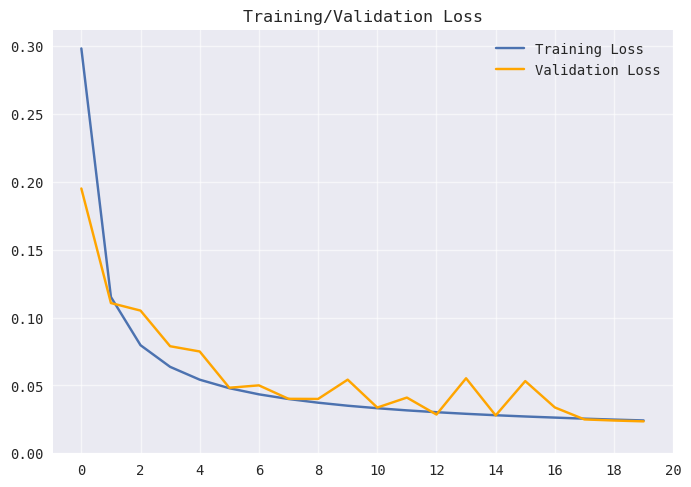

In [12]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [13]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.linear.weight), "Bias: {}".format(Model.linear.bias), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([[1.1845, 0.7482]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([0.0017], device='cuda:0', requires_grad=True)


In [14]:
T = torch.linspace(X.min(), X.max(), SIZE, dtype=DTYPE, device=DEVICE).reshape(SIZE, 1)

slope = -Model.linear.weight[0][0] / Model.linear.weight[0][1]
interc = -Model.linear.bias / Model.linear.weight[0][1]
boundary = slope * T + interc

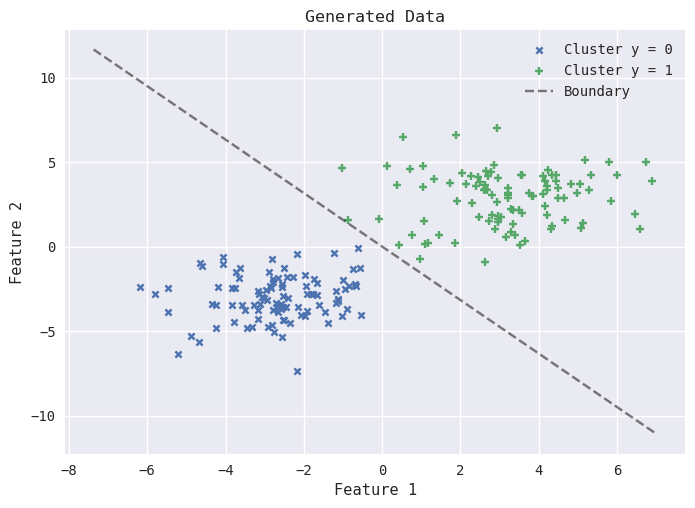

In [15]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
# Decision Boundary
plt.plot(
    T.detach().cpu(),
    boundary.detach().cpu(),
    alpha=.5,
    color='black',
    linestyle='--',
    label="Boundary"
);

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Generated Data");
plt.legend(loc='best');
plt.show();